# PART-A

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

###  1. Data Understanding & Exploration:

- A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. 
- B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 
- C. Merge both the DataFrames together to form a single DataFrame 
- D. Print 5 point summary of the numerical features and share insights. 

In [75]:
car_name = pd.read_csv("Car name.csv")
car_name.dtypes
car_name.shape

(398, 1)

In [76]:
car_attribute = pd.read_json("Car-Attributes.json")
car_attribute.dtypes


mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [77]:
carData = car_name.merge(car_attribute, how='cross')
carData.info()
carData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158404 entries, 0 to 158403
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   car_name  158404 non-null  object 
 1   mpg       158404 non-null  float64
 2   cyl       158404 non-null  int64  
 3   disp      158404 non-null  float64
 4   hp        158404 non-null  object 
 5   wt        158404 non-null  int64  
 6   acc       158404 non-null  float64
 7   yr        158404 non-null  int64  
 8   origin    158404 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 10.9+ MB


(158404, 9)

In [78]:
carData.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,chevrolet chevelle malibu,15.0,8,350.0,165,3693,11.5,70,1
2,chevrolet chevelle malibu,18.0,8,318.0,150,3436,11.0,70,1
3,chevrolet chevelle malibu,16.0,8,304.0,150,3433,12.0,70,1
4,chevrolet chevelle malibu,17.0,8,302.0,140,3449,10.5,70,1


In [79]:
ncarData=carData.drop(columns=["car_name", "yr", "cyl", "origin"])
ncarData.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,158404.0,23.514573,7.806184,9.0,17.5,23.0,29.0,46.6
disp,158404.0,193.425879,104.139092,68.0,104.0,148.5,262.0,455.0
wt,158404.0,2970.424623,845.779903,1613.0,2223.0,2803.5,3609.0,5140.0
acc,158404.0,15.568090,2.754231,8.0,13.8,15.5,17.2,24.8


#### Insights on the five point summary of numeric features of the data:
  - mpg of 23 is the 50% of all the data
  - 50% of the vehical is below 2803.5 unit of the waight, the max value is very high though at 5140.
  - 50% of displacement is under 148.5 and 75% under 262, however the max value for this goes to 455, which suggest there are outliers.
  - 75% of accelartion is below 17.2 and max is 24.8. The median value for this is 15.5.

#### 2. Data Preparation & Analysis:
- A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 
- B. Check for duplicate values in the data and impute with the best suitable approach.
- C. Plot a pairplot for all features. 
- D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 
- E. Share insights for Q2.d. 
- F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 
- G. Share insights for Q2.f.
- H. Check for unexpected values in all the features and datapoints with such values.

In [81]:
# Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach
# Check for duplicate values in the data and impute with the best suitable approach.

def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(carData)

percentage of missing data of dataframe 
 car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [82]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(carData)
duplicate

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
11542,datsun pl510,18.0,8,307.0,130,3504,12.0,70,1
11543,datsun pl510,15.0,8,350.0,165,3693,11.5,70,1
11544,datsun pl510,18.0,8,318.0,150,3436,11.0,70,1
11545,datsun pl510,16.0,8,304.0,150,3433,12.0,70,1
11546,datsun pl510,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
152827,honda civic,27.0,4,140.0,86,2790,15.6,82,1
152828,honda civic,44.0,4,97.0,52,2130,24.6,82,2
152829,honda civic,32.0,4,135.0,84,2295,11.6,82,1
152830,honda civic,28.0,4,120.0,79,2625,18.6,82,1


In [83]:
#Dropping car_name and origin column

carData = carData.drop(['car_name','origin'], axis=1)

carData.head()



,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [84]:
# Scaling data

carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158404 entries, 0 to 158403
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   mpg     158404 non-null  float64
 1   cyl     158404 non-null  int64  
 2   disp    158404 non-null  float64
 3   hp      158404 non-null  object 
 4   wt      158404 non-null  int64  
 5   acc     158404 non-null  float64
 6   yr      158404 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 8.5+ MB


In [85]:
# H. Check for unexpected values in all the features and datapoints with such values.

hpIsDigit = pd.DataFrame(carData.hp.str.isdigit())  # if the string is made of digits store True else False

carData[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
...,...,...,...,...,...,...,...
158132,21.0,6,200.0,?,2875,17.0,74
158336,40.9,4,85.0,?,1835,17.3,80
158342,23.6,4,140.0,?,2905,14.3,80
158360,34.5,4,100.0,?,2320,15.8,81


In [86]:
carData = carData.replace('?', np.nan)
carData[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
...,...,...,...,...,...,...,...
158132,21.0,6,200.0,NaN,2875,17.0,74
158336,40.9,4,85.0,NaN,1835,17.3,80
158342,23.6,4,140.0,NaN,2905,14.3,80
158360,34.5,4,100.0,NaN,2320,15.8,81


In [87]:
carData.median()


mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [88]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158404 entries, 0 to 158403
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   mpg     158404 non-null  float64
 1   cyl     158404 non-null  int64  
 2   disp    158404 non-null  float64
 3   hp      156016 non-null  float64
 4   wt      158404 non-null  int64  
 5   acc     158404 non-null  float64
 6   yr      158404 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 8.5 MB


In [89]:
#Converting NaN to median of that column

medianFiller = lambda x: x.fillna(x.median())
carData = carData.apply(medianFiller,axis=0)

carData['hp'] = carData['hp'].astype('float64')

#Scaling car data

carDataScaled=carData.apply(zscore)
carDataScaled.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


c:\Users\abhin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


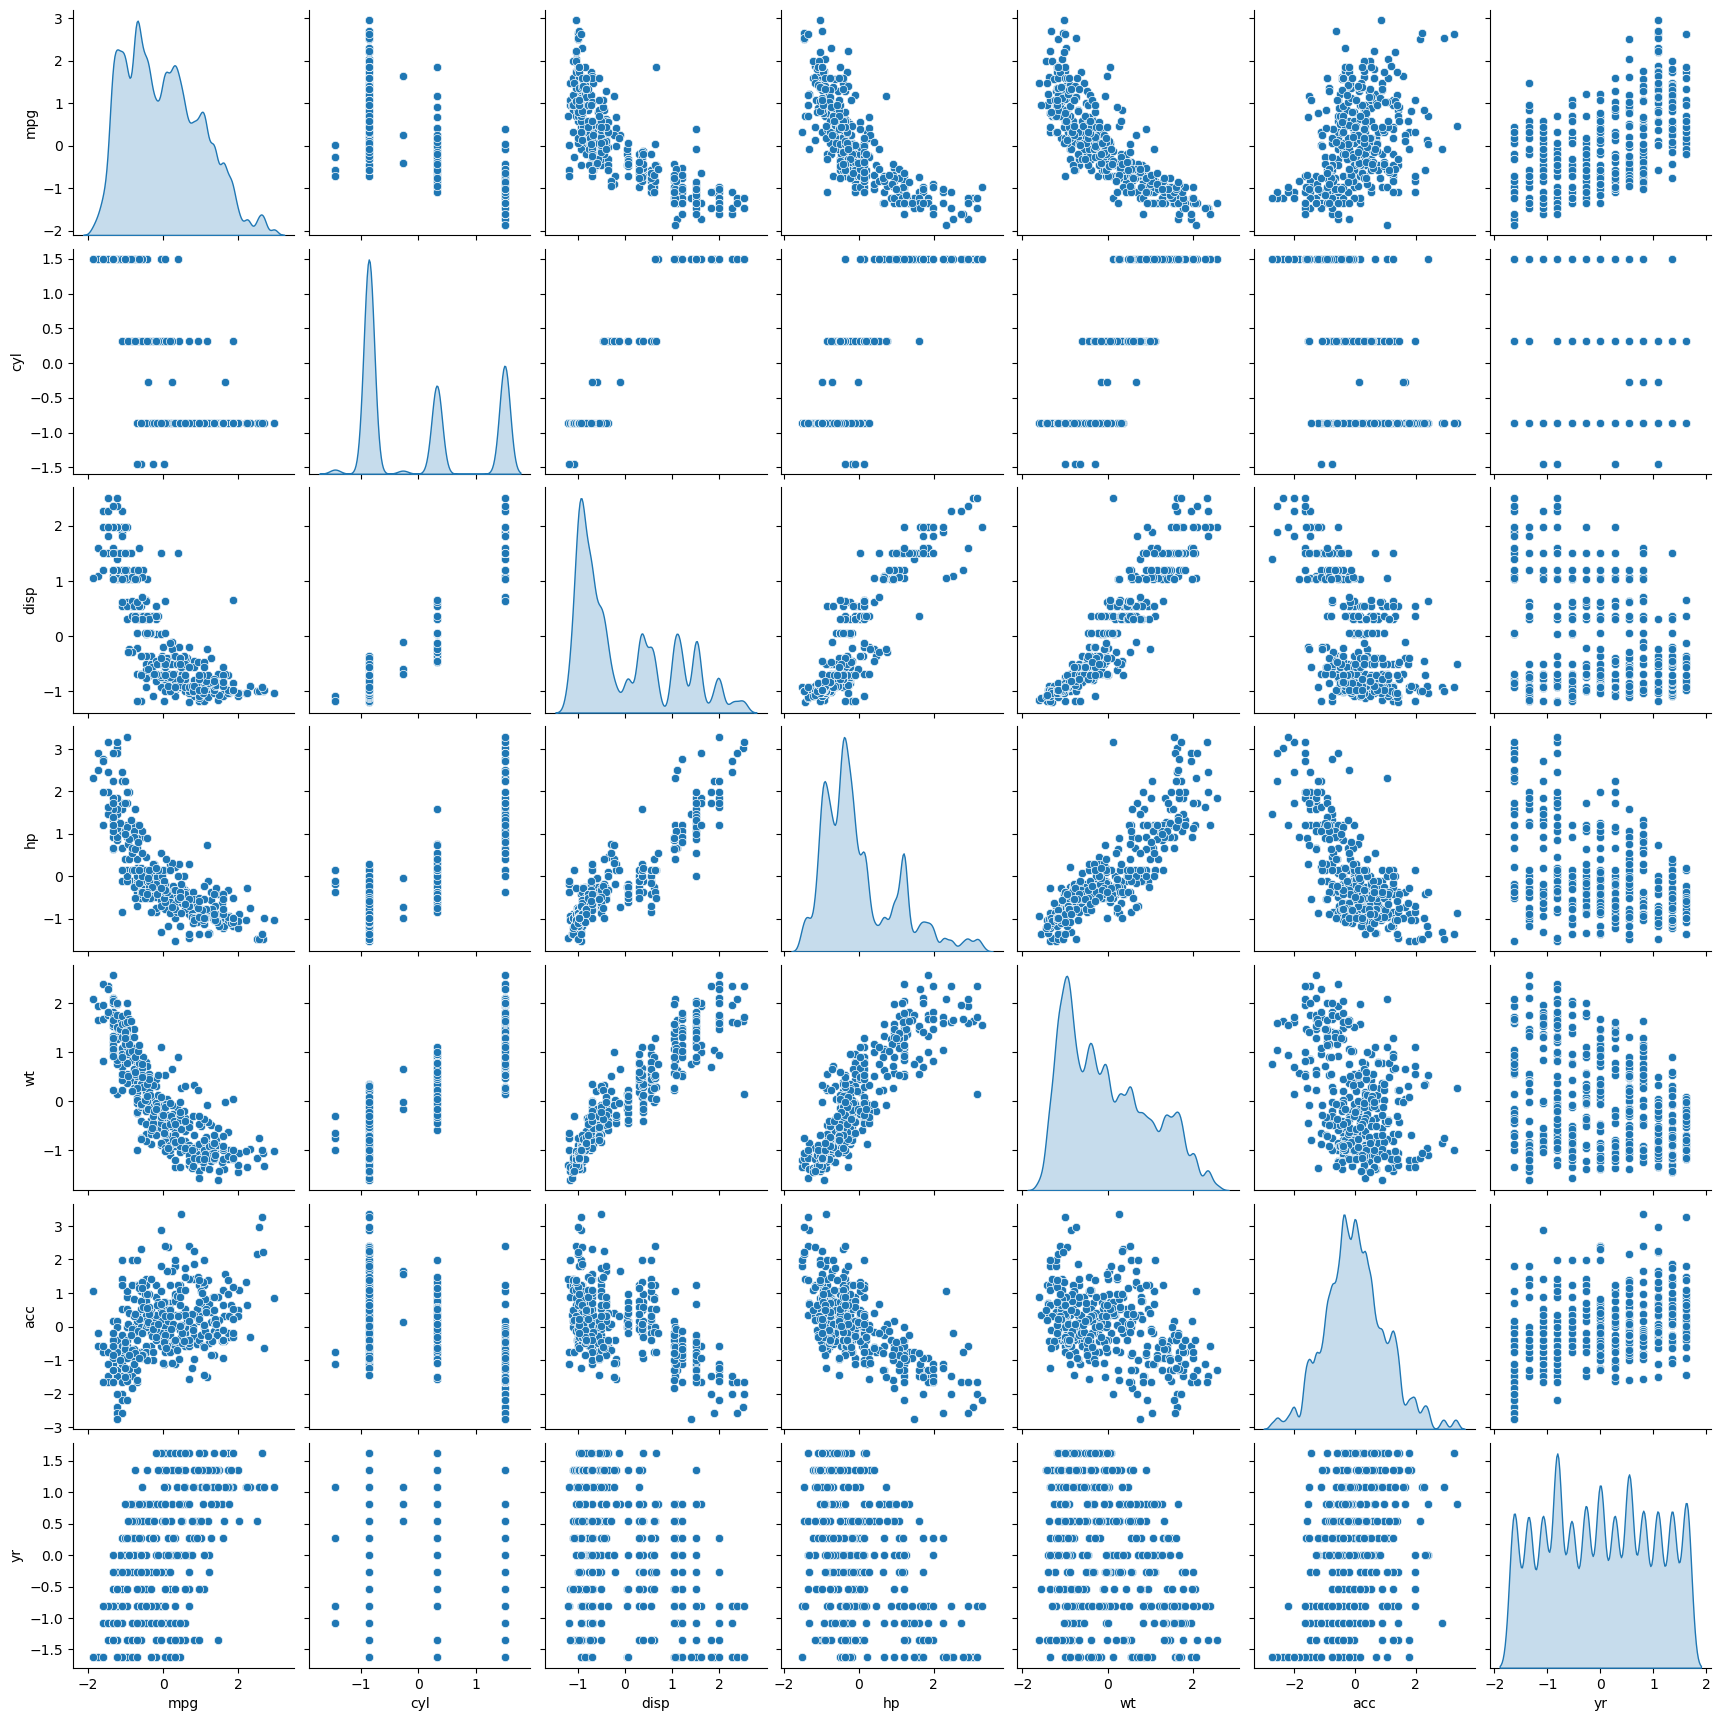

In [90]:
# Plot a pairplot for all features.

sns.pairplot(carDataScaled, diag_kind='kde')

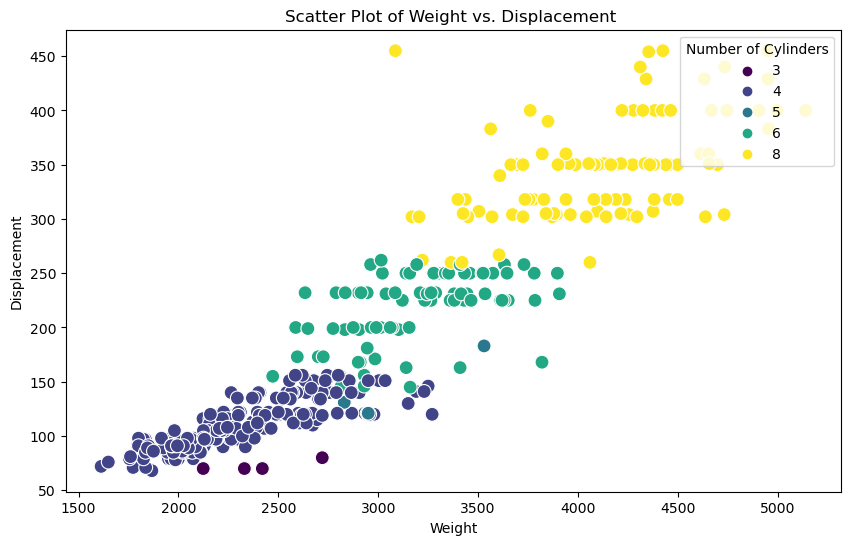

In [92]:
# Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=carData, x='wt', y='disp', hue='cyl', palette='viridis', s=100)

plt.title('Scatter Plot of Weight vs. Displacement ')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.legend(title='Number of Cylinders', loc='upper right')

plt.show()

#### Insight on above scatter plot of Wt vs disp:
- There is clearly a positive relationship between waight and displacement
- Majority of data points are in range of 4 and 6 cylinders
- There are some outliers in wt vs disp for 8 Cylinders cars

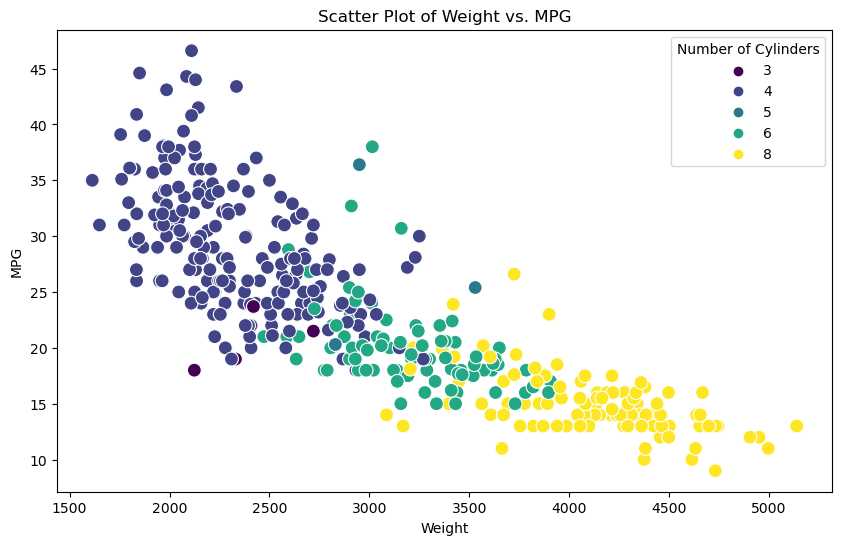

In [ ]:
# Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=carData, x='wt', y='mpg', hue='cyl', palette='viridis', s=100)

plt.title('Scatter Plot of Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend(title='Number of Cylinders', loc='upper right')

plt.show()

#### Insights on above scatter plot on MPG vs Weight
- There is clear negetive correlation between Weight and MPG of the car
- The more the weight the less MPG of the car
- Majority of data points are in the range of 4-6 cylinders

## 3. Clustering:

- A. Apply K-Means clustering for 2 to 10 clusters. 
- B. Plot a visual and find elbow point. 
- C. On the above visual, highlight which are the possible Elbow points. 


c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

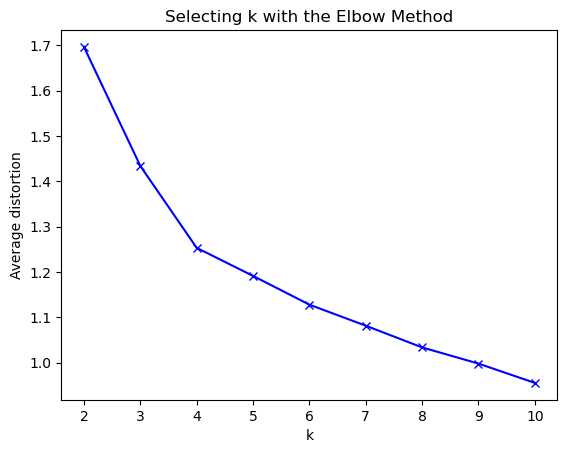

In [94]:
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(carDataScaled)
    prediction=model.predict(carDataScaled)
    meanDistortions.append(sum(np.min(cdist(carDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / carDataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### From above picture elbow point seems at 4

- D. Train a K-means clustering model once again on the optimal number of clusters. 
- E. Add a new feature in the DataFrame which will have labels based upon cluster value. 
- F. Plot a visual and color the datapoints based upon clusters. 
- G. Pass a new DataPoint and predict which cluster it belongs to.

In [95]:
final_model=KMeans(4)
final_model.fit(carDataScaled)
prediction=final_model.predict(carDataScaled)

#Append the prediction 
carData["GROUP"] = prediction
carDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
carData.head()

c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [96]:
carDataCluster = carData.groupby(['GROUP'])
carDataCluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,,
0,32.836036,4.054054,112.153153,75.963964,2323.189189,16.627027,80.162162
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085
2,25.202941,3.990196,109.171569,82.897059,2325.490196,16.450980,73.725490
3,19.636264,6.175824,225.219780,102.862637,3256.098901,16.376923,76.131868


array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>, <Axes: >]],
      dtype=object)

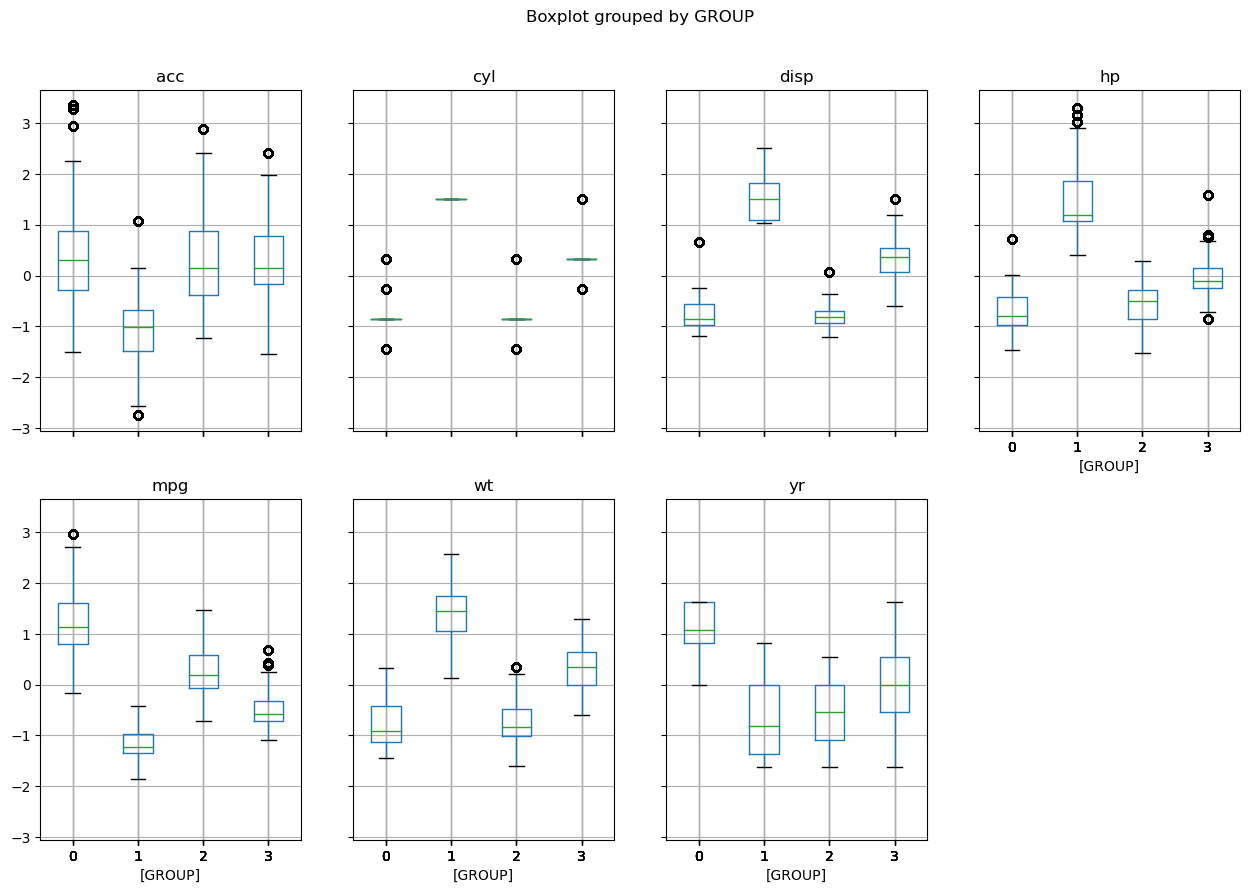

In [97]:
carDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [98]:
carData.tail()

,mpg,cyl,disp,hp,wt,acc,yr,GROUP
158399,27.0,4,140.0,86.0,2790,15.6,82,0
158400,44.0,4,97.0,52.0,2130,24.6,82,0
158401,32.0,4,135.0,84.0,2295,11.6,82,0
158402,28.0,4,120.0,79.0,2625,18.6,82,0
158403,31.0,4,119.0,82.0,2720,19.4,82,0


In [104]:
# Creating new data point for prediction

dataPoint = { 
    'mpg': [28.0], 
    'cyl': [6], 
    'disp': [165.6], 
    'hp': [86.0], 
    'wt': [2672.0],
    'acc': [20.4],
    'yr': [79] 
} 
  
  
# converting to dataframe using DataFrame() 
df = pd.DataFrame(dataPoint)
df

,mpg,cyl,disp,hp,wt,acc,yr
0,28.0,6,165.6,86.0,2672.0,20.4,79


In [103]:
prediction=final_model.predict(df)
df["GROUP"] = prediction
df

,mpg,cyl,disp,hp,wt,acc,yr,GROUP
0,28.0,6,165.6,86.0,2672.0,20.4,79,1


### So the model predicted the new data point in cluster 1

# PART - B

### 1. Data Understanding & Cleaning:

- A. Read ‘vehicle.csv’ and save as DataFrame.
- B. Check percentage of missing values and impute with correct approach. 
- C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 
- D. Check for duplicate rows in the data and impute with correct approach. 

In [108]:
# A. Read ‘vehicle.csv’ and save as DataFrame.
vehicalData = pd.read_csv("vehicle.csv")
vehicalData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [109]:
vehicalData.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [110]:
# B. Check percentage of missing values and impute with correct approach.
# Check missing value by calling the function declared above
check_missing_values(vehicalData)

percentage of missing data of dataframe 
 compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [112]:
nvehicalData=vehicalData.drop('class', axis=1)
nvehicalData.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [117]:
vehicalData["class"].value_counts()

class
car    429
bus    218
van    199
Name: count, dtype: int64

In [118]:
nvehicalData.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [123]:
numerical_columns = vehicalData.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    median_value = vehicalData[col].median()
    vehicalData[col].fillna(median_value, inplace=True)

In [129]:
# D. Check for duplicate rows in the data and impute with correct approach.
# Check duplicate value by calling the fuction declared above
duplicate=check_duplicate(vehicalData)
duplicate

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


No duplcate value found in the data

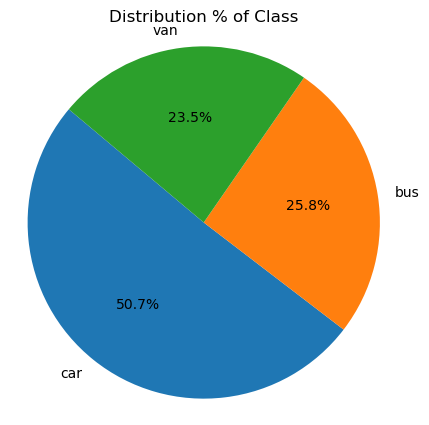

In [128]:
# C. Visualize a Pie-chart and print percentage of values for variable ‘class’.
val_count = vehicalData["class"].value_counts(normalize=True) * 100
labels = val_count.index
sizes = val_count.values
        
        
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution % of Class')
plt.axis('equal')  
plt.show()




## 2. Data Preparation:
- A. Split data into X and Y. [Train and Test optional] 
- B. Standardize the Data. 

In [132]:
# Split data into X and y
X = vehicalData.drop("class", axis=1)
y = vehicalData['class']

from sklearn.model_selection import train_test_split

# Apply zscore
XScaled=X.apply(zscore)

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.30, random_state=1)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


### 3. Model Building:
- A. Train a base Classification model using SVM. 
- B. Print Classification metrics for train data. 
 

In [136]:
# Import required libraries

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [134]:

svm_classifier = SVC(kernel='linear', random_state=1)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nAccuracy of the SVM classifier:")
print(accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy of the SVM classifier:
0.9488188976377953

Confusion Matrix:
[[ 54   3   2]
 [  4 128   1]
 [  1   2  59]]

Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.92      0.92        59
         car       0.96      0.96      0.96       133
         van       0.95      0.95      0.95        62

    accuracy                           0.95       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.95      0.95       254



- C. Apply PCA on the data with 10 components. 
- D. Visualize Cumulative Variance Explained with Number of Components. 
- E. Draw a horizontal line on the above plot to highlight the threshold of 90%. 
- F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 
- G. Train SVM model on components selected from above step. 
- H. Print Classification metrics for train data of above model and share insights.

In [135]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [184]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [185]:
print(pca.explained_variance_)

[9.56791139 3.12572545 1.30769998 1.19005082 0.84649042 0.54393586
 0.36018227 0.2166262  0.15855928 0.08836563]


In [186]:
print(pca.components_)

[[ 2.70070888e-01  2.92577354e-01  3.05804992e-01  2.66456651e-01
   7.34068134e-02  8.37303681e-02  3.19179005e-01 -3.15342964e-01
   3.14904516e-01  2.79556914e-01  3.10752979e-01  3.16780345e-01
   2.78188360e-01 -2.49629018e-02  3.73810511e-02  6.05376730e-02
   2.90696168e-02  7.12417100e-02]
 [-1.16225919e-01  1.18484888e-01 -8.06784111e-02 -1.96570007e-01
  -1.36411591e-01 -9.13255091e-03  5.01445026e-02  1.25757780e-02
   6.21268405e-02  1.08347822e-01  6.32108070e-02  5.82268377e-02
   2.14527586e-01  4.89384369e-01 -1.46435016e-02 -1.32187901e-01
  -5.30238246e-01 -5.46438619e-01]
 [-1.28774075e-01  4.85825581e-02 -7.06194280e-02  2.64770592e-01
   6.54110539e-01  5.03989912e-01 -1.03649807e-01  3.80534406e-02
  -1.20723263e-01  2.88796129e-02  2.47887756e-02 -1.16907763e-01
   4.34831473e-02  2.47033844e-01 -1.43364708e-01 -3.09825828e-01
   3.02624444e-02  4.29042815e-02]
 [-1.22140223e-01 -1.84516840e-01  5.79695256e-02  8.64886417e-02
   9.31668134e-02  1.17474177e-01  7.

In [187]:
print(pca.explained_variance_ratio_)

[0.54262016 0.1772677  0.07416293 0.06749075 0.04800659 0.03084796
 0.02042684 0.01228541 0.00899229 0.00501144]


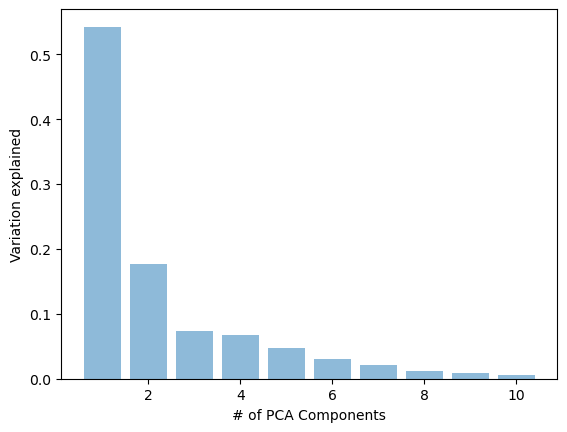

In [188]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()

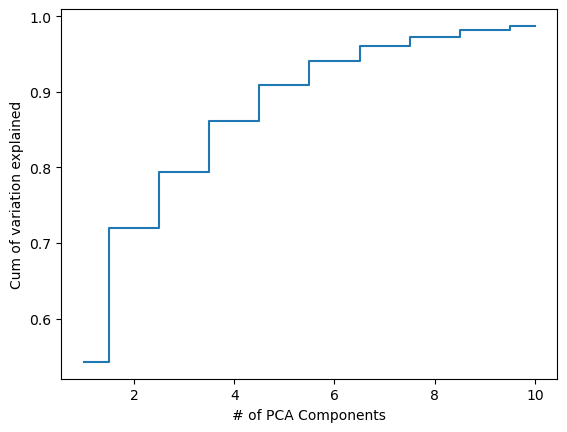

In [189]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

From above visualization of variation explained, it seems 7 components is able to explain more than 95% of data.

In [192]:
pca7 = PCA(n_components=7)
X_train_pca7 = pca7.fit_transform(X_train)
X_test_pca7 = pca7.transform(X_test)

print(pca7.components_)
print(pca7.explained_variance_ratio_)
#Xpca7 = pca7.transform(X_train)

[[ 0.27007089  0.29257735  0.30580499  0.26645665  0.07340681  0.08373037
   0.319179   -0.31534296  0.31490452  0.27955691  0.31075298  0.31678035
   0.27818836 -0.0249629   0.03738105  0.06053767  0.02906962  0.07124171]
 [-0.11622592  0.11848489 -0.08067841 -0.19657001 -0.13641159 -0.00913255
   0.0501445   0.01257578  0.06212684  0.10834782  0.06321081  0.05822684
   0.21452759  0.48938437 -0.0146435  -0.1321879  -0.53023825 -0.54643862]
 [-0.12877408  0.04858256 -0.07061943  0.26477059  0.65411054  0.50398991
  -0.10364981  0.03805344 -0.12072326  0.02887961  0.02478878 -0.11690776
   0.04348315  0.24703384 -0.14336471 -0.30982583  0.03026244  0.04290428]
 [-0.12214022 -0.18451684  0.05796953  0.08648864  0.09316681  0.11747418
   0.07139077 -0.05976848  0.06910017 -0.18614916  0.12681821  0.06362415
  -0.18950032  0.1488544  -0.53178364  0.69933697 -0.13019452 -0.05102459]
 [ 0.0592363  -0.05035601  0.01755563  0.01458621  0.11220292  0.2813175
  -0.04383311  0.09463712 -0.027816

c:\Users\abhin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


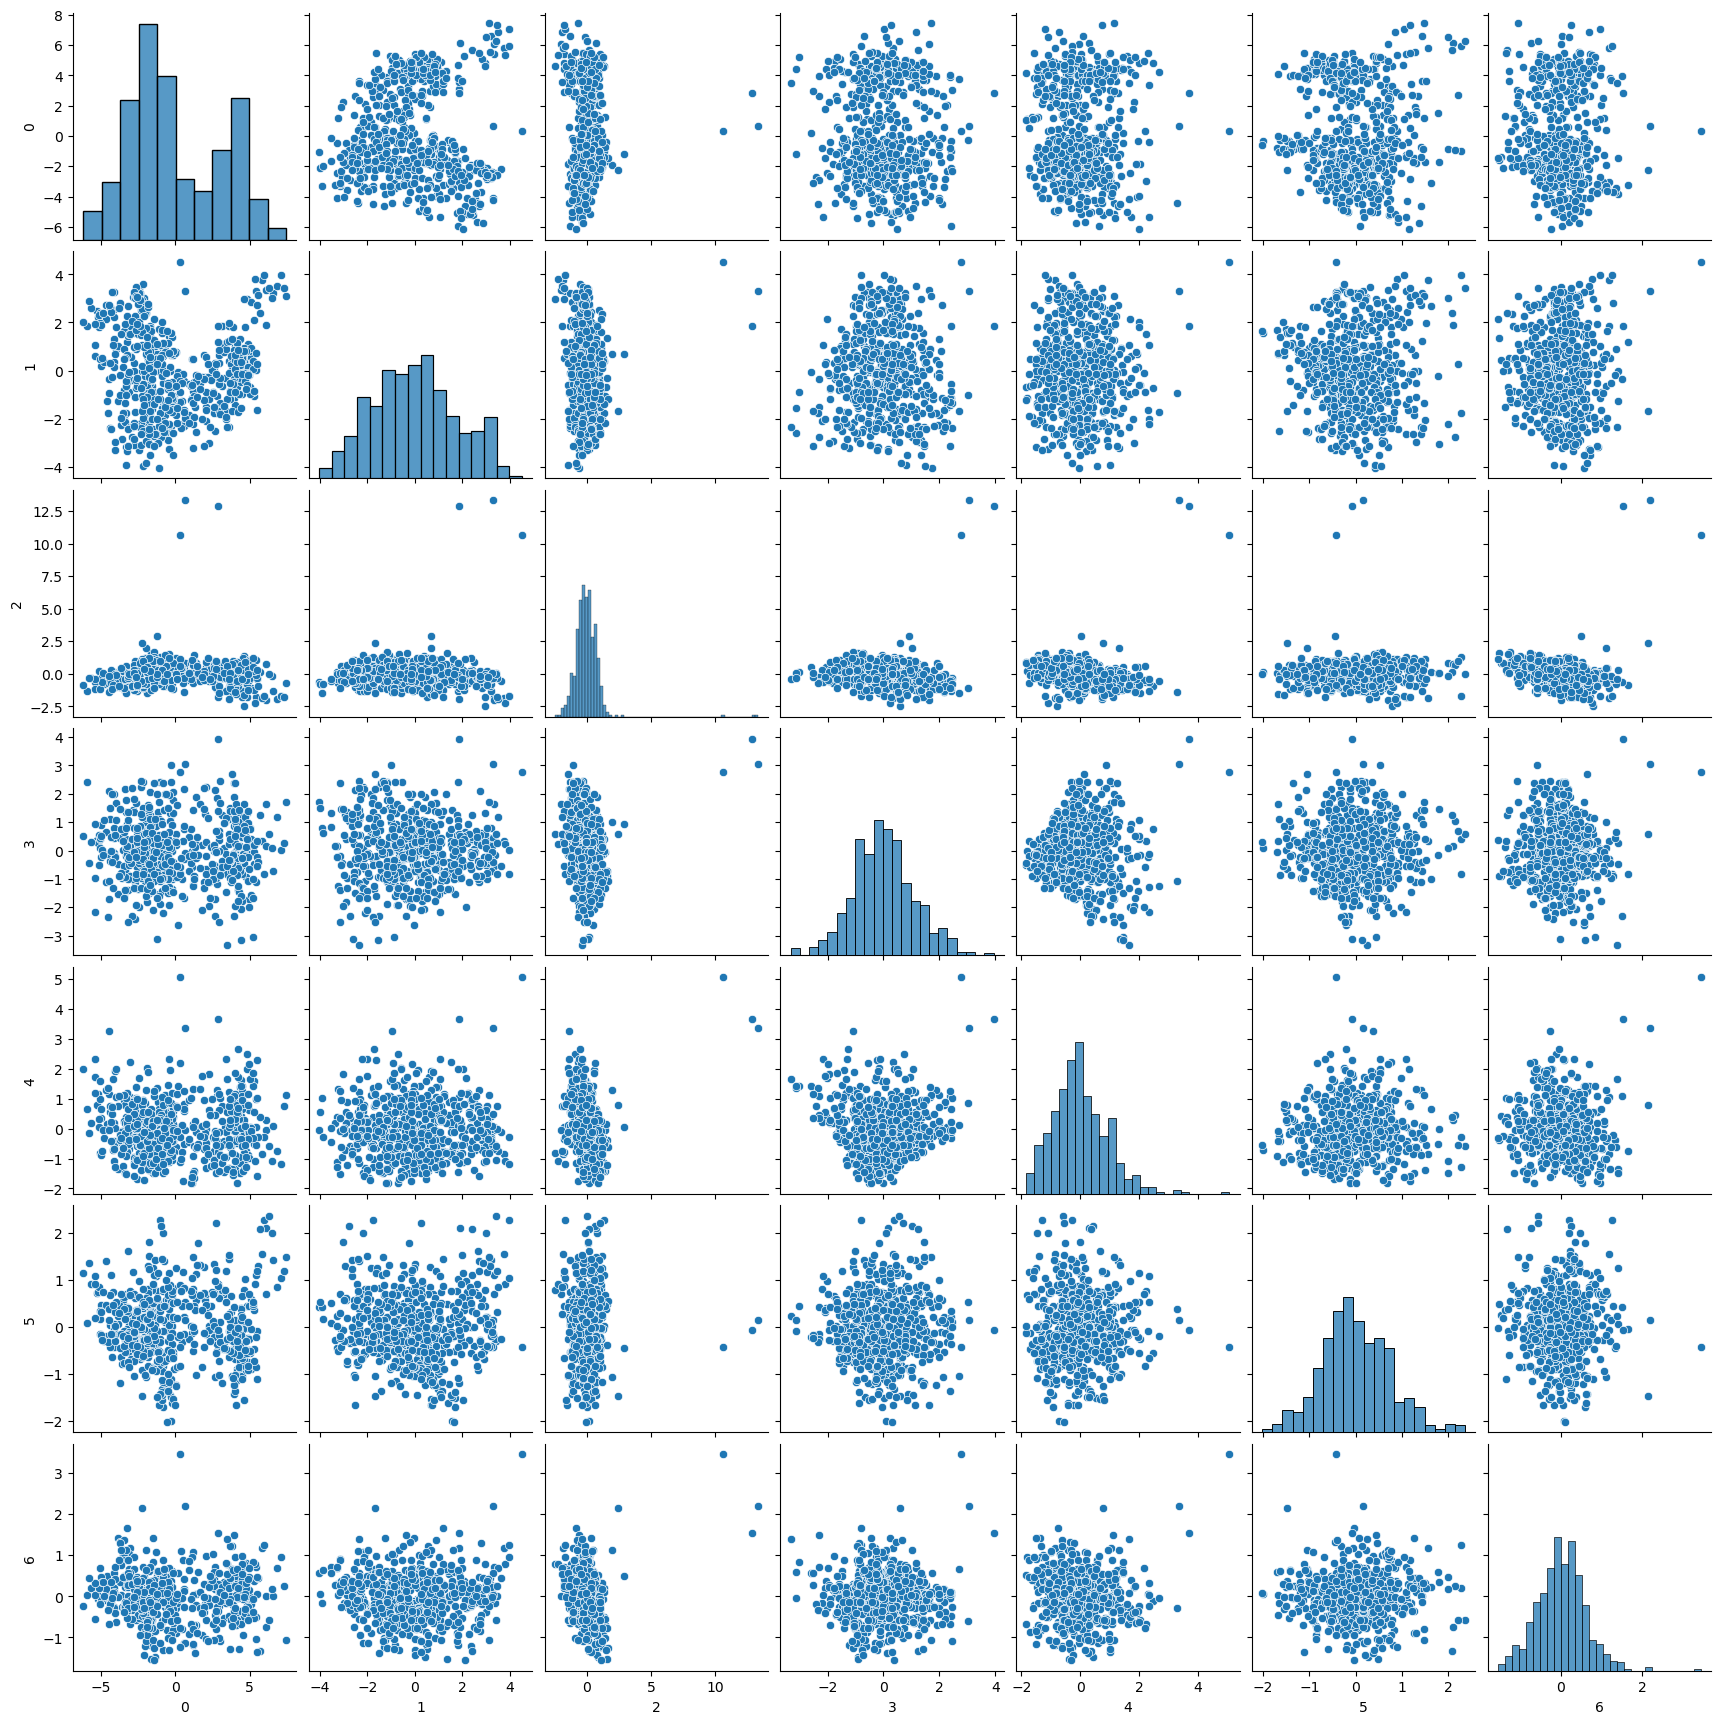

In [193]:
sns.pairplot(pd.DataFrame(X_train_pca7))

Before applying PCA

In [194]:
svm_classifier = SVC(kernel='linear', random_state=1)
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_train, y_train)

0.9662162162162162

After applying PCA

In [195]:
svm_classifier_pca = SVC(kernel='linear', random_state=1)
svm_classifier_pca.fit(X_train_pca, y_train)
svm_classifier_pca.score(X_train_pca, y_train)

0.9172297297297297

After applying PCA with 7 components there is 5% of reduction in score

In [199]:
# G. Train SVM model on components selected from above step.
# H. Print Classification metrics for train data of above model and share insights.

svm_classifier_pca7 = SVC(kernel='linear', random_state=1)
svm_classifier_pca7.fit(X_train_pca7, y_train)

y_pred_pca7 = svm_classifier_pca7.predict(X_train_pca7)

train_accuracy = accuracy_score(y_train, y_pred_pca7)
train_conf_matrix = confusion_matrix(y_train, y_pred_pca7)
train_class_report = classification_report(y_train, y_pred_pca7)   

print("\nAccuracy of the SVM classifier:")
print(accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy of the SVM classifier:
0.9488188976377953

Confusion Matrix:
[[ 54   3   2]
 [  4 128   1]
 [  1   2  59]]

Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.92      0.92        59
         car       0.96      0.96      0.96       133
         van       0.95      0.95      0.95        62

    accuracy                           0.95       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.95      0.95       254



- Each class of vehical has equal precision, recall and f1-score rescpectively
- Accurecy of the SVM classifier after applying PCA is 95% approx.
- 

### 4. Performance Improvement:
- A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.
- B. Share best Parameters observed from above step.


In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto'] 
}

grid_search = GridSearchCV(SVC(random_state=1), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters found by GridSearchCV:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [206]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_pca, y_train)

SVC(C=10, degree=2, random_state=1)

- C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [210]:
y_train_pred_tuned = best_svm.predict(X_train_pca)

train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
train_conf_matrix_tuned = confusion_matrix(y_train, y_train_pred_tuned)
train_class_report_tuned = classification_report(y_train, y_train_pred_tuned)

print("\nAccuracy of the tuned SVM classifier on the training data:")
print(train_accuracy_tuned)
print("\nConfusion Matrix for the training data with the tuned model:")
print(train_conf_matrix_tuned)
print("\nClassification Report for the training data with the tuned model:")
print(train_class_report_tuned)


Accuracy of the tuned SVM classifier on the training data:
0.9847972972972973

Confusion Matrix for the training data with the tuned model:
[[157   0   2]
 [  1 292   3]
 [  0   3 134]]

Classification Report for the training data with the tuned model:
              precision    recall  f1-score   support

         bus       0.99      0.99      0.99       159
         car       0.99      0.99      0.99       296
         van       0.96      0.98      0.97       137

    accuracy                           0.98       592
   macro avg       0.98      0.98      0.98       592
weighted avg       0.98      0.98      0.98       592



- There is clear improvement from 92% to 99%, an increase of 7% for bus class
- There is improvement from 96% to 99%, an increase of 3% for car class
- There is improvement from 95% overall to 96% precision, 98% recall and 97% f1-score
- Accurecy of the model has improved from 95% to 98%, an increase of 3%.

### 5. Data Understanding & Cleaning: 
- A. Explain pre-requisite/assumptions of PCA.


- Data should be scaled, so that unit from the data is removed and all the data is centered around std. deviation.
- Relationships between variables should be linear or in other words multicoreality shoudn't exits among features. 
- The sample size should be large, so that it can capture the data's variability. As small amount of data may not capture variability among the features.
- The data should be continuous.
- Transform data if the data is skewed or have outliers. Noramalization of data is needed before applying PCA.

- B. Explain advantages and limitations of PCA.

- Advantages of PCA: 
  - Removes the correlated attributes.
  - Help to reduce overfitting.
  - Improves the data visualization.
  - It also help to improve the performance of Algorithm. 

- Limitations of PCA: 
  - Data normalization must be needed before applying PCA
  - Some level of information loss.
  - Independent variables are becoming less interpretable.
 